# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
df = df = pd.read_csv('buyer_guide.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Initial visual analysis

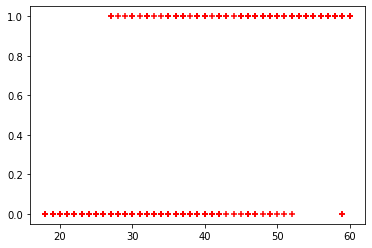

In [4]:
plt.scatter(df.Age,df.Purchased,marker='+',color='red')

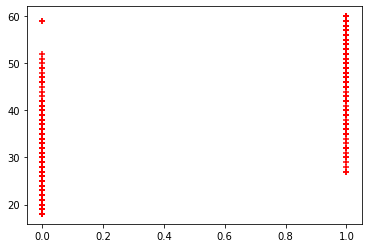

In [5]:
plt.scatter(df.Purchased,df.Age,marker='+',color='red')

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

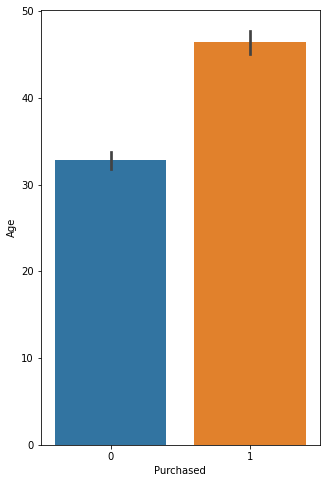

In [6]:
# Relationship between age and purchasing decision

fig = plt.figure(figsize = (5,8))
sns.barplot(x = 'Purchased', y = 'Age', data = df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

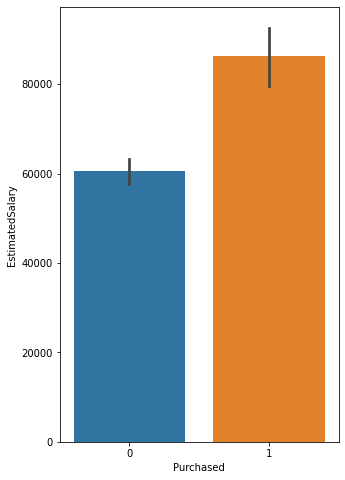

In [7]:
# Relationship between estimated salary and purchasing decision

fig = plt.figure(figsize = (5,8))
sns.barplot(x = 'Purchased', y = 'EstimatedSalary', data = df)

<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

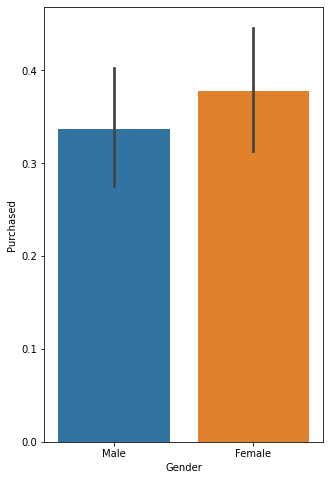

In [8]:
# Relationship between gender and purchasing decision

fig = plt.figure(figsize = (5,8))
sns.barplot(x = 'Gender', y = 'Purchased', data = df)

# Feature selection

In [9]:
# splitting dataset into features and target variable

X = df[df.columns[2:-1]]   # Features
y = df.Purchased           # Target variable

# Splitting data

In [10]:
# splitting dataset into training(80%) and testing(20%) sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
X_train

,Age,EstimatedSalary
341,35,75000
355,60,34000
352,42,90000
346,53,72000
223,60,102000
...,...,...
78,28,87000
177,25,22000
343,47,51000
354,36,99000


In [12]:
X_test

,Age,EstimatedSalary
81,39,42000
209,46,22000
220,41,80000
232,40,107000
152,31,76000
...,...,...
248,41,52000
48,30,135000
255,52,90000
200,35,39000


# Experimenting with different algorithms

In [13]:
# Logistic Regression

LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)
predicted_LogReg_model = LogReg_model.predict(X_test)
print(classification_report(y_test, predicted_LogReg_model))
cross_val = cross_val_score(estimator=LogReg_model, X=X_train,y=y_train,cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        51
           1       0.00      0.00      0.00        29

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

0.64375


In [16]:
# K-Nearest-Neighbour (KNN)

KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train, y_train)
pred_KNN_model = KNN_model.predict(X_test)
print(classification_report(y_test,pred_KNN_model))
cross_val = cross_val_score(estimator = KNN_model, X=X_train,y=y_train,cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        51
           1       0.66      0.79      0.72        29

    accuracy                           0.78        80
   macro avg       0.76      0.78      0.77        80
weighted avg       0.79      0.78      0.78        80

0.825


In [17]:
# Random Forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
cross_val = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.86      0.86      0.86        29

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80

0.890625


In [22]:
# Stochastic Gradient Descent classifier

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        51
           1       0.00      0.00      0.00        29

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

0.53125


As we can see from the above results, random forest classifier is the most efficient algorithm as compared to other's, hence we will proceed with that.

# Steps to improve results

In [24]:
# Improving results by using Randomized SearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rfc_optimized = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rfc_optimized.fit(X_train, y_train)
pred_optimized = rfc_optimized.predict(X_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.3s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.3s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=6

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   1.1s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=155; total time=   0.3s
[CV] END bootstrap=True, max_depth=76, max

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=65, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=261; total time=   0.5s
[CV] END bootstrap=True, max_depth=6

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   1.2s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   1.3s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   1.2s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, max_depth=65,

[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=894; total time=   2.1s
[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=894; total time=   2.1s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   0.8s
[CV] END bootstrap=True, max_depth=

In [25]:
print(classification_report(y_test, pred_optimized))
print(rfc_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.90      0.93      0.92        29

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 32, 'bootstrap': True}


In [26]:
rfeval = cross_val_score(estimator=rfc, X = X_train, y=y_train, cv=10)
rfeval.mean()

0.890625

In [28]:
# By using the above mentioned (tuned) hyperparameters

rf_optimized = RandomForestClassifier(n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features='auto', max_depth = 32, bootstrap = True)
rf_optimized.fit(X_train, y_train)

rfeval = cross_val_score(estimator=rf_optimized, X=X_train, y=y_train, cv=10)
rfeval.mean()

0.896875

# Confusion matrix

In [30]:
from sklearn import metrics

Confusion_Matrix = metrics.confusion_matrix(y_test, pred_rfc)

In [31]:
Confusion_Matrix

array([[47,  4],
       [ 4, 25]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

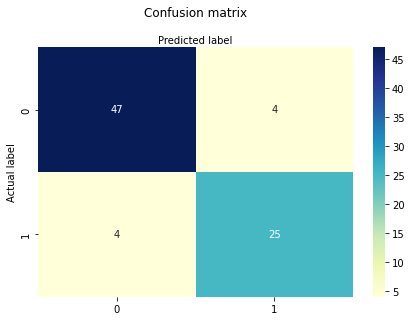

In [32]:
# Visual representation of confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating heatmap
sns.heatmap(pd.DataFrame(Confusion_Matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Accuracy, Precision and Recall

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_rfc))
print("Precision:",metrics.precision_score(y_test, pred_rfc))
print("Recall:",metrics.recall_score(y_test, pred_rfc))

Accuracy: 0.9
Precision: 0.8620689655172413
Recall: 0.8620689655172413
